In [2657]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# importing Pandas and Numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2658]:
# Importing data set
df = pd.read_csv(r"C:\Users\krish\OneDrive\Desktop\UpGrad\Course 2 Machine Learning 1\Lead Scoring Case Study\Leads.csv")

In [2659]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2660]:
df.shape

(9240, 37)

In [2661]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Step 1: Handling Null Values

In [2663]:
# null values
round((df.isnull().sum()/len(df))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [2664]:
columns = round((df.isnull().sum()/len(df))*100,2) 

In [2665]:
drop_columns = columns[columns > 40]

In [2666]:
drop_columns= pd.DataFrame(drop_columns)
print(drop_columns)

                                 0
Lead Quality                 51.59
Asymmetrique Activity Index  45.65
Asymmetrique Profile Index   45.65
Asymmetrique Activity Score  45.65
Asymmetrique Profile Score   45.65


#### Dropping columns with more than 40% null values from dataframe

In [2668]:
df.drop(drop_columns.index,axis=1, inplace=True)

In [2669]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [2670]:
df.shape

(9240, 32)

##### Let us check the null values between 20% and 40% and see how we can address them

In [2672]:
columns = round((df.isnull().sum()/len(df))*100,2)
columns[(columns>=20) & (columns<40)]

Country                                          26.63
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Profile                                     29.32
dtype: float64

Understanding the distribution of data in these columns

In [2674]:
df['Country'].value_counts(dropna=False)/len(df['Country'])

Country
India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sr

India and NaN values form 97% of data. As the data in Country columns is skewed towards one value, dropping the column Country

In [2676]:
df = df.drop(['Country'],axis=1)

In [2677]:
df['How did you hear about X Education'].value_counts(dropna=False)/len(df['How did you hear about X Education'])


How did you hear about X Education
Select                   0.545779
NaN                      0.238853
Online Search            0.087446
Word Of Mouth            0.037662
Student of SomeSchool    0.033550
Other                    0.020130
Multiple Sources         0.016450
Advertisements           0.007576
Social Media             0.007251
Email                    0.002814
SMS                      0.002489
Name: count, dtype: float64

Select + Nan values form 78% of data. As missing values is more than 45%, dropping this column

In [2679]:
df = df.drop(['How did you hear about X Education'],axis=1)

In [2680]:
df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [2681]:
#imputing Nan values with mode "Unemployed"

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [2682]:
df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [2683]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [2684]:
#imputing Nan values with mode "Better Career Prospects"
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [2685]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

This column has skewed data leaning towards one value and hence dropping this column

In [2687]:
df = df.drop(['What matters most to you in choosing a course'],axis=1)

In [2688]:
#checking value counts of Tag variable
df['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [2689]:
#imputing Nan values with mode "Not Available"
df['Tags'] = df['Tags'].replace(np.nan, 'Not Available')

In [2690]:
#replacing tags with low frequency with "Other Tags"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)','Graduation in progress',
                                     'number not provided', 'opp hangup','Still Thinking','Lost to Others','Shall take in the next coming month',
                                 'Lateral student','Interested in Next batch','invalid number','wrong number given','Not doing further education',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems','Interested  in full time MBA',
                                    'University not recognized'], 'Other_Tags')


In [2691]:
df['Tags'].value_counts(dropna=False)

Tags
Not Available                          3353
Will revert after reading the email    2072
Ringing                                1203
Other_Tags                              675
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Name: count, dtype: int64

In [2692]:
df['Lead Profile'].value_counts(dropna=False)/len(df['Lead Profile'])

Lead Profile
Select                         0.448701
NaN                            0.293182
Potential Lead                 0.174567
Other Leads                    0.052706
Student of SomeSchool          0.026082
Lateral Student                0.002597
Dual Specialization Student    0.002165
Name: count, dtype: float64

NaN + Select are more than 74% of values. Dropping the column 'Lead Profile'

In [2694]:
df = df.drop(['Lead Profile'],axis =1)

In [2695]:
columns = round((df.isnull().sum()/len(df))*100,2)
columns[(columns>=20) & (columns<40)]

Series([], dtype: float64)

We have handled the columns which had between 20% and 40% null values

In [2697]:
df.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
Specialization                              1438
What is your current occupation                0
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendations                        0
Receive More Updates

We still have data with null values which needs to be handled before move ahead

In [2699]:
#checking value counts of "City" column
df['City'].value_counts(dropna=False)

City
Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [2700]:
# Replacing Select and Nan with mode value for "City" which is Mumbai
df['City']= df['City'].replace(np.nan,'Mumbai')
df['City']= df['City'].replace('Select','Mumbai')

In [2701]:
df['Specialization'].value_counts(dropna=False)

Specialization
Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [2702]:
# Replacing Select and Nan with for "Specialization" with Not Available
df['Specialization']= df['Specialization'].replace(np.nan,'Not Available')
df['Specialization']= df['Specialization'].replace('Select','Available')

In [2703]:
#combining lower frequency values 
df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')

In [2704]:
df['Lead Source'].value_counts(dropna= False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [2705]:
#replacing Nan Values and combining low frequency values
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat','youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

In [2706]:
# Last Activity:
df['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [2707]:
#replacing Nan Values and combining low frequency values

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation',
                                                        'Approached upfront',
                                                        'View in browser link Clicked',
                                                        'Email Marked Spam',
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [2708]:
100*df.isnull().sum()/len(df)

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.000000
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               0.000000
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.

Dropping the rows with null values for TotalVisits and Page Views Per Visit as these are only 1.5%

In [2710]:
df = df.dropna()

In [2711]:
100*df.isnull().sum()/len(df)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

## Step 2: Handling Incorrect Entries

In [2713]:
for col in df.columns:
    print(f"\n________________\ncol name: {col}\n_______________\n")
    print(df[col].unique())


________________
col name: Prospect ID
_______________

['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']

________________
col name: Lead Number
_______________

[660737 660728 660727 ... 579545 579538 579533]

________________
col name: Lead Origin
_______________

['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']

________________
col name: Lead Source
_______________

['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'Welingak Website' 'Social Media' 'Others']

________________
col name: Do Not Email
_______________

['No' 'Yes']

________________
col name: Do Not Call
_______________

['No' 'Yes']

________________
col name: Converted
_______________

[0 1]

________________
col name: TotalVisits
_______________

[  0.   5.   2.   1.   4.

Analysis

Columns - Magazine, X Education Forums, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque - have only one value , No. This will not contribute to the analysis and the columns can be dropped.


Columns - Do not Email, Do not Call, Search,  Newspaper Article, Newspaper, Digital Advertisement, Through Recommendations, A free copy of Mastering The Interview - have Yes and No values. These need to be converted to binary - 0 (No) and 1 (Yes).

In [2717]:
select = ['Specialization','City']
only_no = ['Magazine','X Education Forums','Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
yes_and_no = ['Do Not Email','Do Not Call','Search','Newspaper Article', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview']

### 2.1 Dropping columns with No values

In [2719]:
df = df.drop(only_no,axis=1)


### 2.2 Handling columns with select values

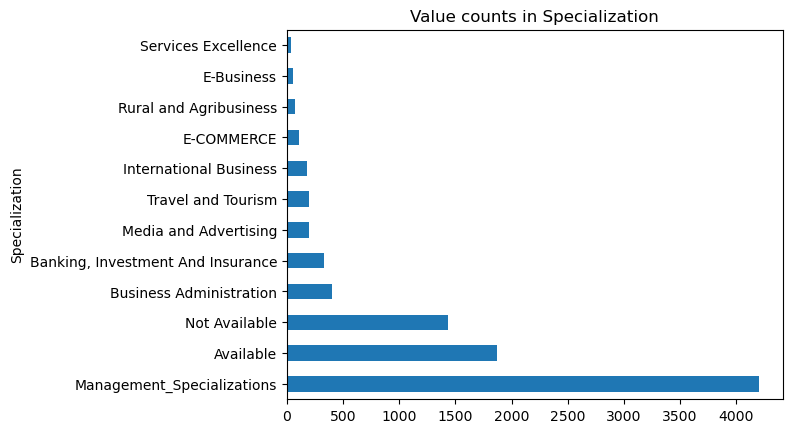

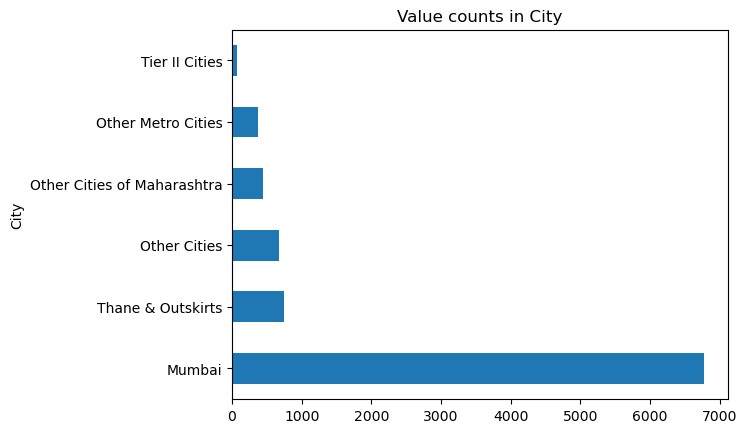

In [2721]:
for col in select:
    df[col].value_counts().plot(kind='barh',title=f'Value counts in {col}')
    plt.show()

### 2.3 Converting Yes/ No columns to binary values

In [2723]:
yes_and_no = ['Do Not Email','Do Not Call','Search','Newspaper Article', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview']

In [2724]:
df[yes_and_no] = df[yes_and_no].replace("Yes",1).replace("No",0)

In [2725]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What is your current occupation,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,Unemployed,0,0,0,0,0,Interested in other courses,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,Unemployed,0,0,0,0,0,Ringing,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,Student,0,0,0,0,0,Will revert after reading the email,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,Unemployed,0,0,0,0,0,Ringing,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,Unemployed,0,0,0,0,0,Will revert after reading the email,Mumbai,0,Modified


In [2726]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Do Not Email                            9103 non-null   int64  
 5   Do Not Call                             9103 non-null   int64  
 6   Converted                               9103 non-null   int64  
 7   TotalVisits                             9103 non-null   float64
 8   Total Time Spent on Website             9103 non-null   int64  
 9   Page Views Per Visit                    9103 non-null   float64
 10  Last Activity                           9103 non-null   object 
 

In [2727]:
df.Converted.value_counts()

Converted
0    5642
1    3461
Name: count, dtype: int64

### Step 3: Exploratory Data Analysis (EDA)


Checking relationship of converted leads with Lead Origin and Lead Source attributes

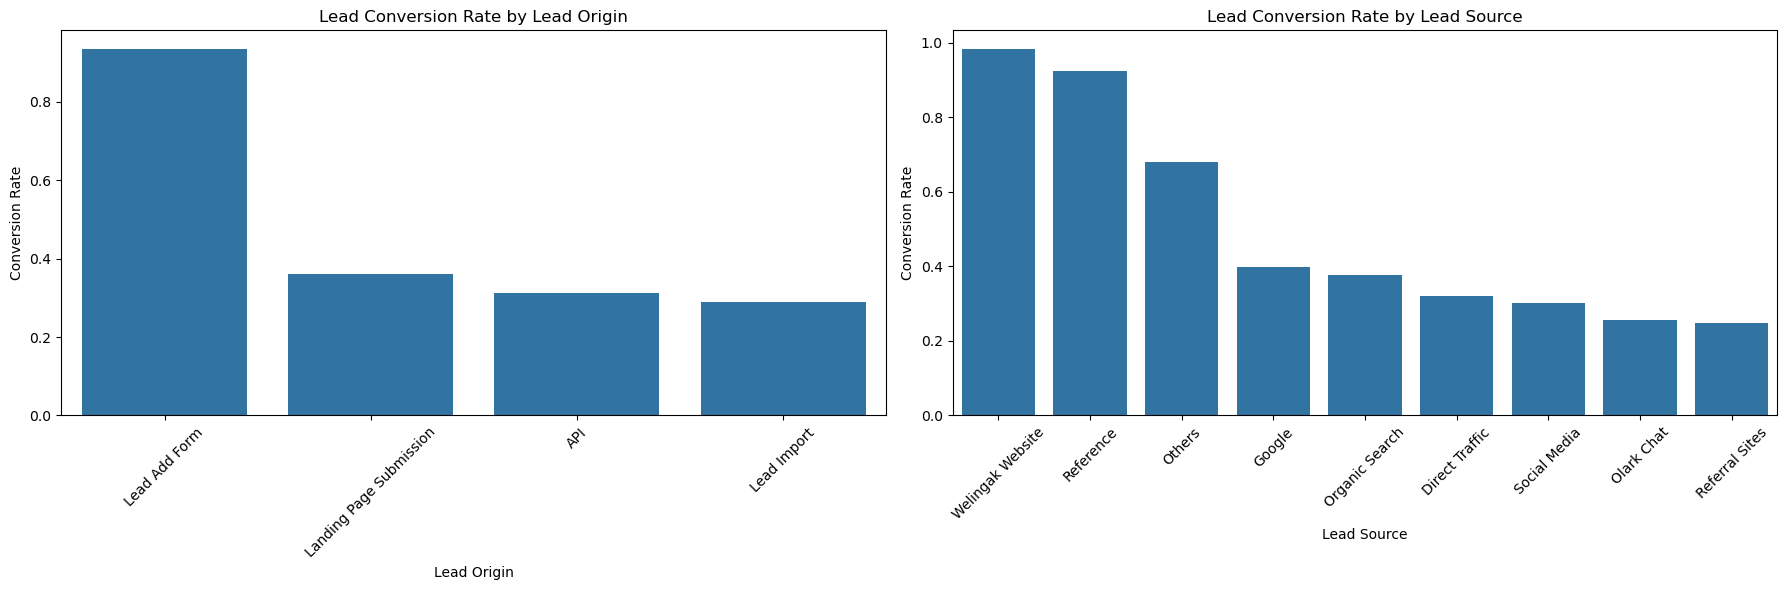

In [2730]:
# Setting up the subplot for a 1x2 layout
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Conversions for Lead Origin
lead_origin_conversion = df.groupby('Lead Origin')['Converted'].mean().sort_values(ascending=False)
sns.barplot(x=lead_origin_conversion.index, y=lead_origin_conversion.values, ax=axes[0])
axes[0].set_title('Lead Conversion Rate by Lead Origin')
axes[0].set_xlabel('Lead Origin')
axes[0].set_ylabel('Conversion Rate')
axes[0].tick_params(axis='x', rotation=45)

# Conversions for Lead Source
lead_source_conversion = df.groupby('Lead Source')['Converted'].mean().sort_values(ascending=False)
sns.barplot(x=lead_source_conversion.index, y=lead_source_conversion.values, ax=axes[1])
axes[1].set_title('Lead Conversion Rate by Lead Source')
axes[1].set_xlabel('Lead Source')
axes[1].set_ylabel('Conversion Rate')
axes[1].tick_params(axis='x', rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Lead Origin identifier from Lead Add Form has the best conversion rate followed by API. 
Conversion rate is extremely good for lead source as Welingank Sites and References. Social Media / Google are not that effective source of lead

Lets find conversion rate relationship with user attributes like Country, Specialization, Current Occupation, City

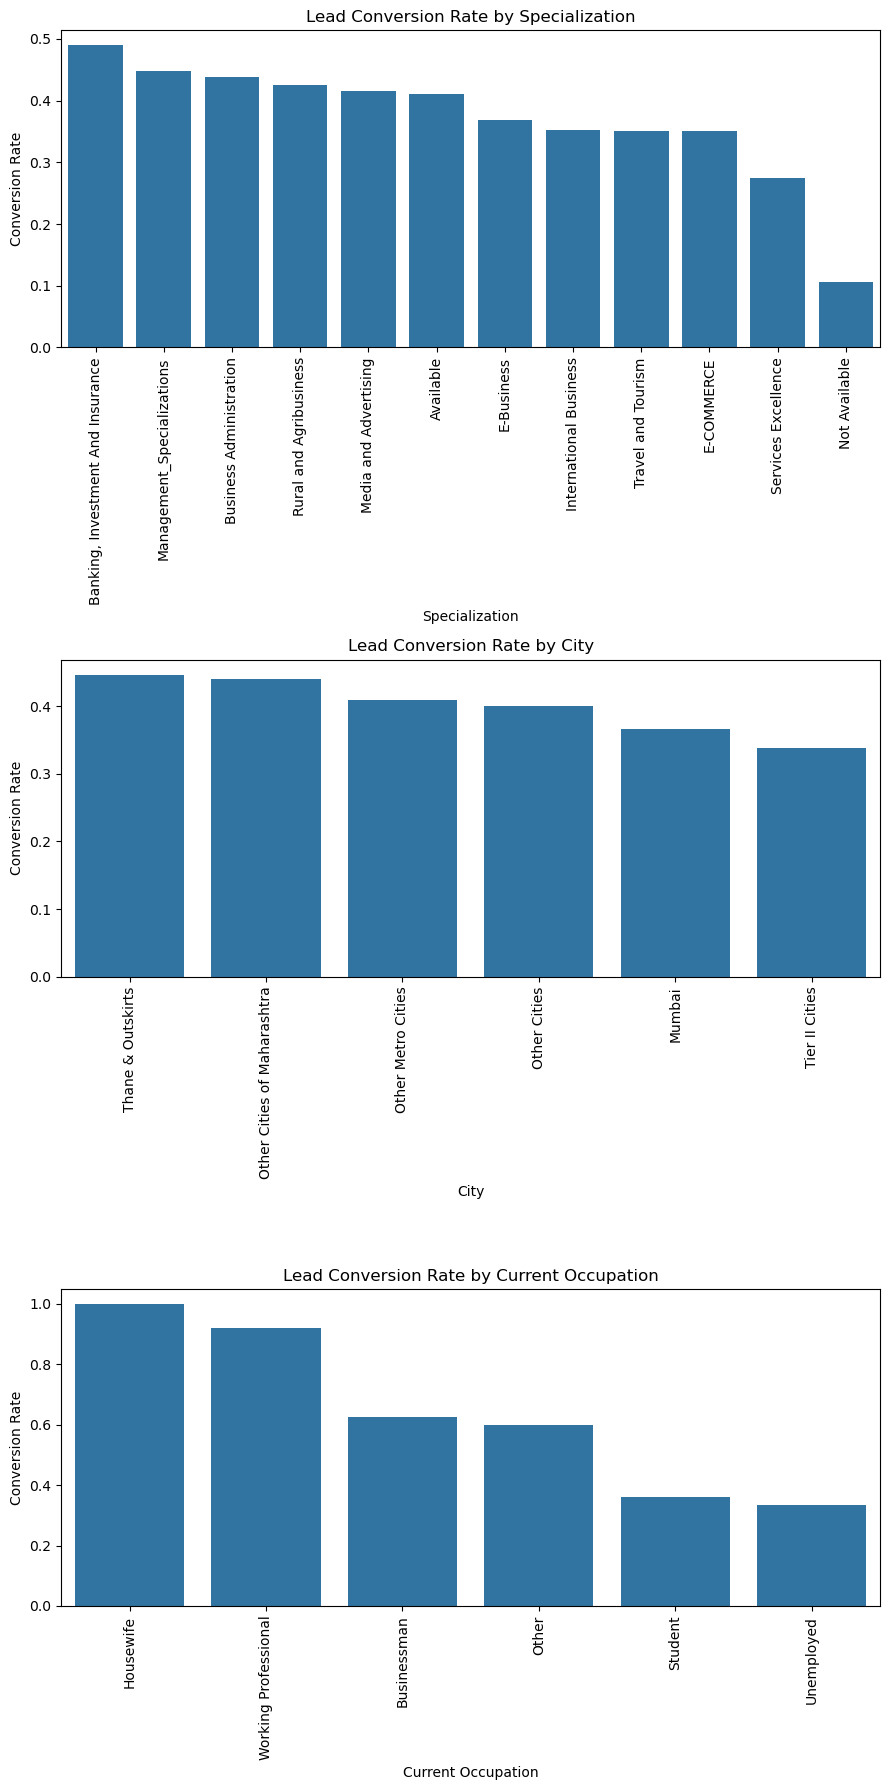

In [2733]:
# Setting up the subplot for a 3x1 layout
fig, axes = plt.subplots(3, 1, figsize=(9, 18))

# Conversions for Specialization
specialization_conversion = df.groupby('Specialization')['Converted'].mean().sort_values(ascending=False)
sns.barplot(x=specialization_conversion.index, y= specialization_conversion.values, ax=axes[0])
axes[0].set_title('Lead Conversion Rate by Specialization')
axes[0].set_xlabel('Specialization')
axes[0].set_ylabel('Conversion Rate')
axes[0].tick_params(axis='x', rotation=90)

# Conversions for City
city_conversion = df.groupby('City')['Converted'].mean().sort_values(ascending=False)
sns.barplot(x=city_conversion.index, y= city_conversion.values, ax=axes[1])
axes[1].set_title('Lead Conversion Rate by City')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Conversion Rate')
axes[1].tick_params(axis='x', rotation=90)

# Conversions for Current Occupation
occupation_conversion = df.groupby('What is your current occupation')['Converted'].mean().sort_values(ascending=False)
sns.barplot(x= occupation_conversion.index, y= occupation_conversion.values, ax=axes[2])
axes[2].set_title('Lead Conversion Rate by Current Occupation')
axes[2].set_xlabel('Current Occupation')
axes[2].set_ylabel('Conversion Rate')
axes[2].tick_params(axis='x', rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

Lead Conversions are higher in case of House wife and Working Professionals in the domain of Management and Banking/Finance mostly. Students and Unemployed status respondents are less likely to convert. Within India, no specific city/area shows better conversion rate

Let us find relationship between conversion rate and User browsing pattern

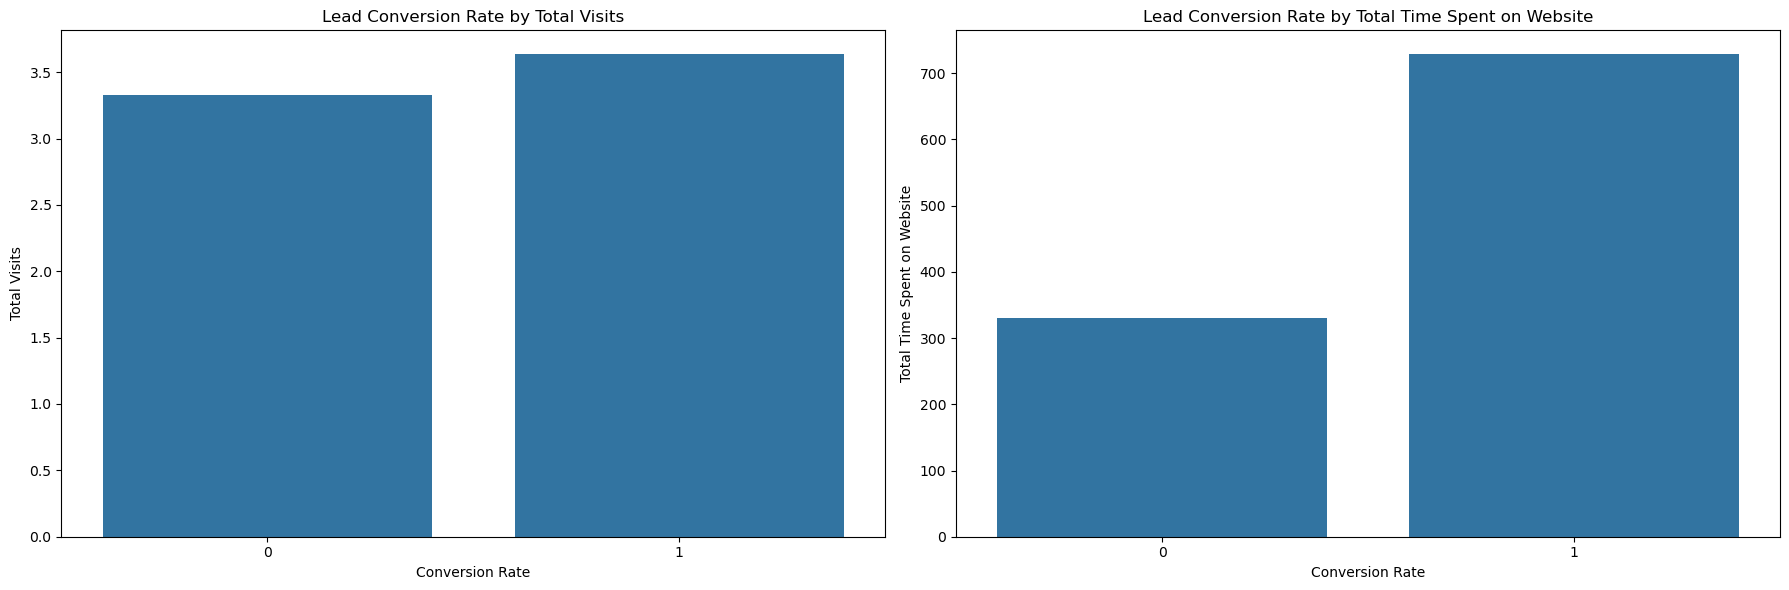

In [2736]:
# Setting up the subplot for a 1x2 layout
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Conversions for Total visits
total_visits_conversion = df.groupby('Converted')['TotalVisits'].mean().sort_values(ascending=False)
sns.barplot(x= total_visits_conversion.index, y= total_visits_conversion.values, ax=axes[0])
axes[0].set_title('Lead Conversion Rate by Total Visits')
axes[0].set_xlabel('Conversion Rate')
axes[0].set_ylabel('Total Visits')
axes[0].tick_params(axis='x', rotation=0)


# Conversions for Total Time Spent on Website
total_time_spent_conversion = df.groupby('Converted')['Total Time Spent on Website'].mean().sort_values(ascending=False)
sns.barplot(x= total_time_spent_conversion.index, y= total_time_spent_conversion.values, ax=axes[1])
axes[1].set_title('Lead Conversion Rate by Total Time Spent on Website')
axes[1].set_xlabel('Conversion Rate')
axes[1].set_ylabel('Total Time Spent on Website')
axes[1].tick_params(axis='x', rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

It is clear that conversion rate is high for users who visit 5 or more number of times. If the user have spent more time on the website, conversion rate improves

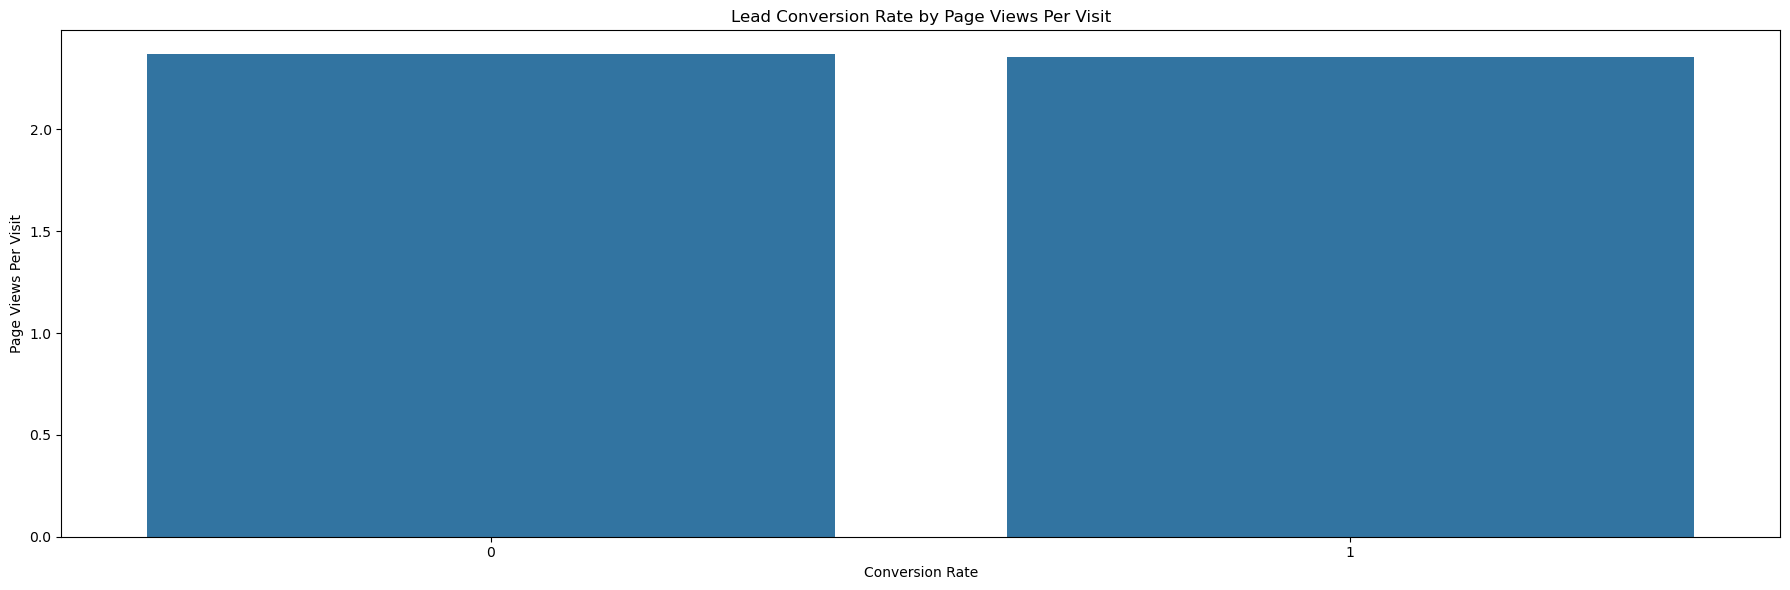

In [2738]:
# Setting up the subplot for a 1x1 layout
fig, axes = plt.subplots(1, 1, figsize=(18, 6))

# Conversions for Page Views Per Visit
page_view_visit_conversion = df.groupby('Converted')['Page Views Per Visit'].mean().sort_values(ascending=False)
sns.barplot(x= page_view_visit_conversion.index, y= page_view_visit_conversion.values)
axes.set_title('Lead Conversion Rate by Page Views Per Visit')
axes.set_xlabel('Conversion Rate')
axes.set_ylabel('Page Views Per Visit')
axes.tick_params(axis='x', rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

Page views per visit is not impact conversion rate

In [2740]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Newspaper Article', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Conversion rate based on Activity

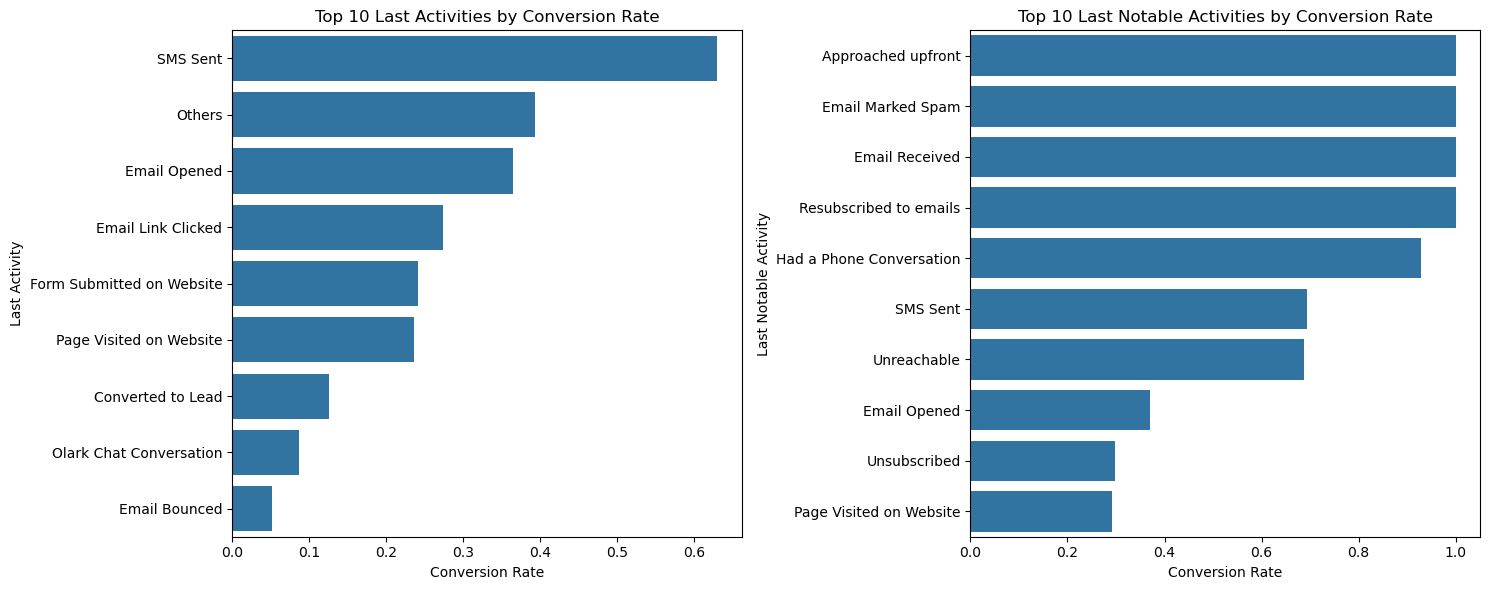

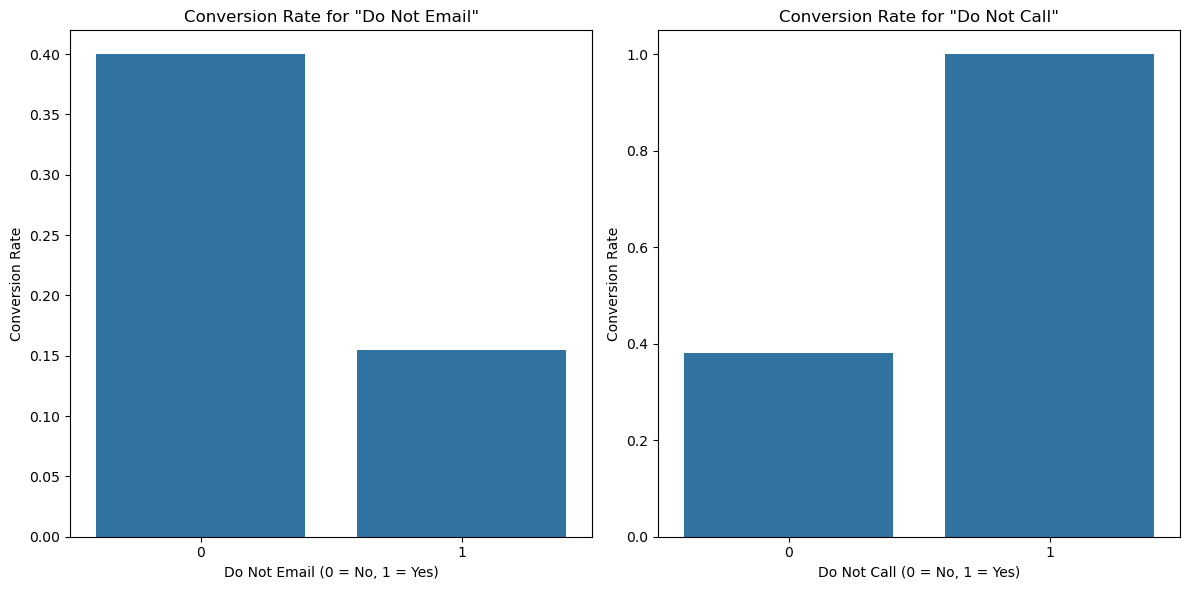

In [2742]:
# Top 10 Last Activities by Conversion Rate
top_10_last_activity = df.groupby('Last Activity')['Converted'].mean().sort_values(ascending=False).head(10).reset_index()

# Top 10 Last Notable Activities by Conversion Rate
top_10_last_notable_activity = df.groupby('Last Notable Activity')['Converted'].mean().sort_values(ascending=False).head(10).reset_index()

# Conversion Rates for 'Do Not Email' and 'Do Not Call'
do_not_email_conversion = df.groupby('Do Not Email')['Converted'].mean().reset_index()
do_not_call_conversion = df.groupby('Do Not Call')['Converted'].mean().reset_index()

# Plotting Top 10 Last Activities and Last Notable Activities
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Last Activity
sns.barplot(data=top_10_last_activity, x='Converted', y='Last Activity', ax=axes[0])
axes[0].set_title('Top 10 Last Activities by Conversion Rate')
axes[0].set_xlabel('Conversion Rate')
axes[0].set_ylabel('Last Activity')

# Plot for Last Notable Activity
sns.barplot(data=top_10_last_notable_activity, x='Converted', y='Last Notable Activity', ax=axes[1])
axes[1].set_title('Top 10 Last Notable Activities by Conversion Rate')
axes[1].set_xlabel('Conversion Rate')
axes[1].set_ylabel('Last Notable Activity')

plt.tight_layout()
plt.show()

# Plotting 'Do Not Email' and 'Do Not Call' Conversion Rates
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Do Not Email
sns.barplot(data=do_not_email_conversion, x='Do Not Email', y='Converted', ax=axes[0])
axes[0].set_title('Conversion Rate for "Do Not Email"')
axes[0].set_xlabel('Do Not Email (0 = No, 1 = Yes)')
axes[0].set_ylabel('Conversion Rate')

# Do Not Call
sns.barplot(data=do_not_call_conversion, x='Do Not Call', y='Converted', ax=axes[1])
axes[1].set_title('Conversion Rate for "Do Not Call"')
axes[1].set_xlabel('Do Not Call (0 = No, 1 = Yes)')
axes[1].set_ylabel('Conversion Rate')

plt.tight_layout()
plt.show()

We can see that a lead is more likely to be converted when they are contacted either through email, or approached in person. Phone conversations come very close to the top and can be looked at when there is additional support

Conversion rate and Customer Preference

This includes factors such as the most important reason for choosing a course, search, exposure to a newspaper article, newspaper, digital advertisements, through recommendations, and the offer of a free copy of "Mastering The Interview."

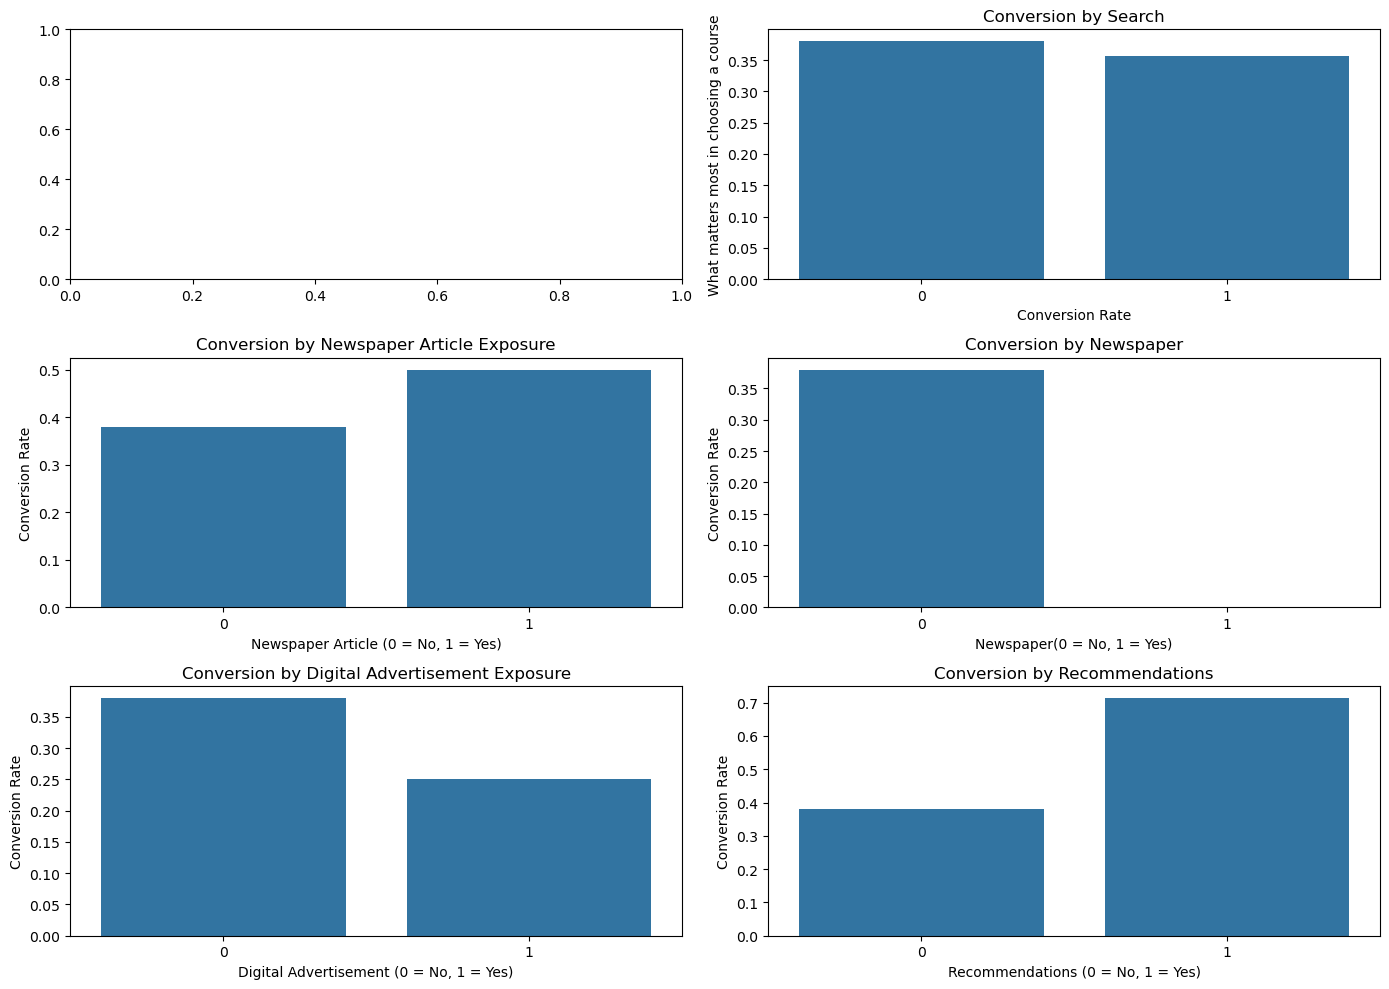

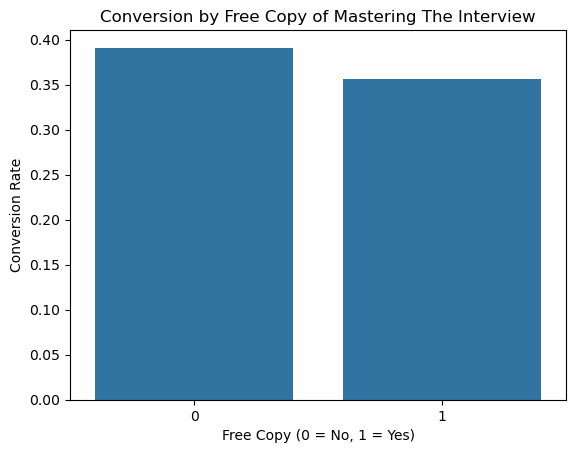

In [2746]:

# Conversion Rate for 'Search'
conversion_search = df.groupby('Search')['Converted'].mean().reset_index()

# Conversion Rate for 'Newspaper Article'
conversion_newspaper_article = df.groupby('Newspaper Article')['Converted'].mean().reset_index()

# Conversion Rate for 'Newspaper'
conversion_newspaper = df.groupby('Newspaper')['Converted'].mean().reset_index()

# Conversion Rate for 'Digital Advertisement'
conversion_digital_ad = df.groupby('Digital Advertisement')['Converted'].mean().reset_index()

# Conversion Rate for 'Through Recommendations'
conversion_recommendations = df.groupby('Through Recommendations')['Converted'].mean().reset_index()

# Conversion Rate for 'A free copy of Mastering The Interview'
conversion_free_copy = df.groupby('A free copy of Mastering The Interview')['Converted'].mean().reset_index()

# Plotting Preferences and Conversion Rates
fig, axes = plt.subplots(3, 2, figsize=(14, 10))

# Search
sns.barplot(data=conversion_search, x='Search', y='Converted', ax=axes[0, 1])
axes[0, 1].set_title('Conversion by Search')
axes[0, 1].set_xlabel('Conversion Rate')
axes[0, 1].set_ylabel('What matters most in choosing a course')

# Newspaper Article
sns.barplot(data=conversion_newspaper_article, x='Newspaper Article', y='Converted', ax=axes[1, 0])
axes[1,0].set_title('Conversion by Newspaper Article Exposure')
axes[1,0].set_xlabel('Newspaper Article (0 = No, 1 = Yes)')
axes[1,0].set_ylabel('Conversion Rate')

# Newspaper
sns.barplot(data=conversion_newspaper, x='Newspaper', y='Converted', ax=axes[1, 1])
axes[1,1].set_title('Conversion by Newspaper')
axes[1,1].set_xlabel('Newspaper(0 = No, 1 = Yes)')
axes[1,1].set_ylabel('Conversion Rate')

# Digital Advertisement
sns.barplot(data=conversion_digital_ad, x='Digital Advertisement', y='Converted', ax=axes[2, 0])
axes[2,0].set_title('Conversion by Digital Advertisement Exposure')
axes[2,0].set_xlabel('Digital Advertisement (0 = No, 1 = Yes)')
axes[2,0].set_ylabel('Conversion Rate')

# Through Recommendations
sns.barplot(data=conversion_recommendations, x='Through Recommendations', y='Converted', ax=axes[2, 1])
axes[2,1].set_title('Conversion by Recommendations')
axes[2,1].set_xlabel('Recommendations (0 = No, 1 = Yes)')
axes[2,1].set_ylabel('Conversion Rate')

# Adjust layout
plt.tight_layout()
plt.show()

# Free Copy of Mastering the Interview
sns.barplot(data=conversion_free_copy, x='A free copy of Mastering The Interview', y='Converted')
plt.title('Conversion by Free Copy of Mastering The Interview')
plt.xlabel('Free Copy (0 = No, 1 = Yes)')
plt.ylabel('Conversion Rate')
plt.show()


Free Copy of Mastering the interview does not exactly have a positive impact on the lead conversion. In fact, newspaper advertisement has not converted any of its leads. Ads in Search also is not yielding in conversion rate. Digital Ads are a mixed bag, while recommendations have positive relation with conversions

In [2748]:
df['Newspaper Article'].value_counts()

Newspaper Article
0    9101
1       2
Name: count, dtype: int64

In [2749]:
df['Newspaper'].value_counts()

Newspaper
0    9102
1       1
Name: count, dtype: int64

In [2750]:
df['Search'].value_counts()

Search
0    9089
1      14
Name: count, dtype: int64

In [2751]:
df['Digital Advertisement'].value_counts()

Digital Advertisement
0    9099
1       4
Name: count, dtype: int64

In [2752]:
df['Through Recommendations'].value_counts()

Through Recommendations
0    9096
1       7
Name: count, dtype: int64

Newspaper Article, Newspaper, Search,Digital Advertisement, Through Recommendations - these columns can be dropped as these have same value for all the records. These will not add any value to the analysis

In [2754]:
df = df.drop(['Newspaper','Newspaper Article','Through Recommendations','Search','Digital Advertisement'],axis=1)

In [2755]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Dropping Prospect ID column as it is not useful for model creation

In [2757]:
df = df.drop(['Prospect ID',],axis=1)

In [2758]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9103 non-null   int64  
 1   Lead Origin                             9103 non-null   object 
 2   Lead Source                             9103 non-null   object 
 3   Do Not Email                            9103 non-null   int64  
 4   Do Not Call                             9103 non-null   int64  
 5   Converted                               9103 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9103 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9103 non-null   object 
 10  Specialization                          9103 non-null   object 
 

These are final columns/ attributes from the data set that we will use for model creation and evaluation

In [2760]:
df.shape # 15 features

(9103, 16)

##### Combining Lower Frequency Values for Last Notable Activity

In [2762]:
df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [2763]:
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable',
                                                                         'Unsubscribed','Email Bounced','Resubscribed to emails',
                                                                       'View in browser link Clicked','Approached upfront',
                                                                       'Form Submitted on Website','Email Received'],'Other_Notable_activity')

### Dummy Variable Creation

In [2765]:
#getting a list of categorical columns

cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [2766]:
#getting dummies and dropping the first column and adding the results to the master dataframe

dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation','City']], drop_first=True,dtype= int)

df = pd.concat([df,dummy],axis =1)


In [2767]:
dummy = pd.get_dummies(df['Specialization'], prefix  = 'Specialization',dtype= int)
dummy = dummy.drop(['Specialization_Not Available'], axis =1)
df = pd.concat([df, dummy], axis = 1)

In [2768]:
dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source',dtype= int)
dummy = dummy.drop(['Lead Source_Others'],axis= 1)
df = pd.concat([df, dummy], axis = 1)


In [2769]:
dummy = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity',dtype= int)
dummy = dummy.drop(['Last Activity_Others'], axis=1)
df = pd.concat([df, dummy], axis = 1)

In [2770]:
dummy = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity',dtype= int)
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], axis=1)
df = pd.concat([df, dummy], axis = 1)

In [2771]:
df['Tags'].value_counts()

Tags
Not Available                          3333
Will revert after reading the email    2035
Ringing                                1189
Other_Tags                              673
Interested in other courses             509
Already a student                       465
Closed by Horizzon                      301
switched off                            240
Busy                                    185
Lost to EINS                            173
Name: count, dtype: int64

In [2772]:
dummy = pd.get_dummies(df['Tags'], prefix  = 'Tags',dtype= int)
dummy = dummy.drop(['Tags_Not Available'], axis= 1)
df = pd.concat([df, dummy], axis = 1)

In [2773]:
#dropping the original columns after dummy variable creation

df.drop(cat_cols,axis=1,inplace = True)

In [2774]:
df.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,660727,0,0,1,2.0,1532,2.0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,660719,0,0,0,1.0,305,1.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,660681,0,0,1,2.0,1428,1.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## Step 4: Modelling

In [2776]:
df_model = df.drop(['Lead Number'],axis =1)

### 4.1: Test-Train Split

In [2778]:
from sklearn.model_selection import train_test_split

In [2779]:
X = df_model.drop(['Converted'],axis =1)
y = df_model['Converted']

In [2780]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 61 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9103 non-null   int64  
 1   Do Not Call                                           9103 non-null   int64  
 2   TotalVisits                                           9103 non-null   float64
 3   Total Time Spent on Website                           9103 non-null   int64  
 4   Page Views Per Visit                                  9103 non-null   float64
 5   A free copy of Mastering The Interview                9103 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9103 non-null   int32  
 7   Lead Origin_Lead Add Form                             9103 non-null   int32  
 8   Lead Origin_Lead Import                               9103 non-

In [2781]:
numeric = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
binary = ['Through Recommendations','Search','Do Not Email','Do Not Call','Digital Advertisement','A free copy of Mastering The Interview']
category = ['Lead Origin','Lead Source','Last Activity','Last Notable Activity','Country','What is your current occupation','Specialization','City','Tags']

In [2782]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [2783]:
print(X_train.shape,y_train.shape)

(6372, 61) (6372,)


In [2784]:
print(X_test.shape,y_test.shape)

(2731, 61) (2731,)


### 4.2: Scaling of data using StandardScaler

In [2786]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,...,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
7962,0,0,-0.092900,1.476324,-0.394072,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
5520,0,0,0.695064,-0.771066,2.111481,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1962,0,0,0.301082,-0.571257,0.061483,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1566,0,0,2.074000,1.393834,0.517039,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9170,0,0,-0.683873,-0.881052,-1.077404,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### 4.3: Model Building using Stats Model & RFE

In [2788]:
import statsmodels.api as sm

In [2789]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [2790]:
rfe.support_

array([False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True])

In [2791]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 2),
 ('Do Not Call', False, 42),
 ('TotalVisits', False, 38),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 40),
 ('A free copy of Mastering The Interview', False, 46),
 ('Lead Origin_Landing Page Submission', False, 26),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 32),
 ('What is your current occupation_Housewife', False, 35),
 ('What is your current occupation_Other', False, 47),
 ('What is your current occupation_Student', False, 23),
 ('What is your current occupation_Unemployed', False, 22),
 ('What is your current occupation_Working Professional', False, 3),
 ('City_Other Cities', False, 34),
 ('City_Other Cities of Maharashtra', False, 33),
 ('City_Other Metro Cities', False, 36),
 ('City_Thane & Outskirts', False, 43),
 ('City_Tier II Cities', False, 20),
 ('Specialization_Available', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Admin

In [2792]:
col = X_train.columns[rfe.support_]

In [2793]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specializati

In [2794]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1196.1
Date:                Sun, 16 Mar 2025   Deviance:                       2392.2
Time:                        12:46:21   Pearson chi2:                 1.06e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6142
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6303      0.090    -18.163      0.000      -1.806      -1.454
Total Time Spent on Website                       0.9644      0.055     17.499      0.000       0.856       1.072
Lead Origin_Lead Add Form                         1.2712      0.392      3.242      0.001       0.503       2.040
Specialization_Available                          1.8821      0.141     13.355      0.000       1.606       2.158
Lead Source_Welingak Website                      2.5625      0.846      3.028      0.002       0.904       4.221
Last Activity_SMS Sent                            1.8767      0.117     15.976      0.000       1.646       2.107
Last Notable Activity_Modified                   -1.6149      0.129    -12.489      0.000      -1.868      -1.361
Last Notable Activity_Olark Chat Conversation    -1.3958      0.442     -3.161      0.002      -2.261      -0.530
Tags_Already a student                           -3.6965      0.612     -6.038      0.000      -4.896      -2.497
Tags_Closed by Horizzon                           6.6630      0.741      8.987      0.000       5.210       8.116
Tags_Interested in other courses                 -2.6609      0.376     -7.072      0.000      -3.398      -1.923
Tags_Lost to EINS                                 6.3305      0.733      8.633      0.000       4.893       7.768
Tags_Other_Tags                                  -2.2703      0.244     -9.320      0.000      -2.748      -1.793
Tags_Ringing                                     -3.8900      0.252    -15.448      0.000      -4.384      -3.396
Tags_Will revert after reading the email          4.6040      0.191     24.104      0.000       4.230       4.978
Tags_switched off                                -4.1740      0.638     -6.544      0.000      -5.424      -2.924
=================================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

#### Checking VIF

In [2797]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2798]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values.astype(float), i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.78
13,Tags_Will revert after reading the email,1.52
4,Last Activity_SMS Sent,1.48
2,Specialization_Available,1.41
3,Lead Source_Welingak Website,1.40
5,Last Notable Activity_Modified,1.40
0,Total Time Spent on Website,1.23
8,Tags_Closed by Horizzon,1.22
9,Tags_Interested in other courses,1.19
12,Tags_Ringing,1.14


The VIF values are less than 5 so there is no corelation between the features.Moving on to derive the Probabilities, Lead Score, Predictions on Train Data



In [2800]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm.astype(float)).values.reshape(-1)
y_train_pred[:10]

array([0.35431839, 0.0851773 , 0.0146096 , 0.9868481 , 0.01346021,
       0.07726717, 0.02168633, 0.93014525, 0.35357966, 0.98286293])

In [2801]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.354318,7962
1,0,0.085177,5520
2,0,0.014610,1962
3,1,0.986848,1566
4,0,0.013460,9170


In [2802]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.354318,7962,0
1,0,0.085177,5520,0
2,0,0.014610,1962,0
3,1,0.986848,1566,1
4,0,0.013460,9170,0


In [2803]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3802  151]
 [ 300 2119]]


In [2804]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9292215944758317


#### Metrics beyond simply accuracy

In [2806]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [2807]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8759818106655642

In [2808]:
# Let us calculate specificity
TN / float(TN+FP)

0.9618011636731596

In [2809]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.038198836326840374


In [2810]:
# positive predictive value
print (TP / float(TP+FP))

0.9334801762114537


In [2811]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9268649439297904


### Plotting the ROC Curve

In [2813]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [2814]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.354318,7962,0
1,0,0.085177,5520,0
2,0,0.014610,1962,0
3,1,0.986848,1566,1
4,0,0.013460,9170,0


In [2815]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'], drop_intermediate = False )

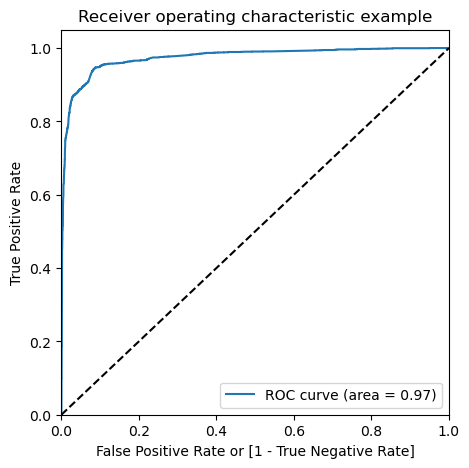

In [2816]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

### Finding Optimal Cutoff Point

In [2818]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.354318,7962,0,1,1,1,1,0,0,0,0,0,0
1,0,0.085177,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.014610,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.986848,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.013460,9170,0,1,0,0,0,0,0,0,0,0,0


In [2819]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.850753  0.968995  0.778396
0.2   0.2  0.919648  0.950393  0.900835
0.3   0.3  0.926397  0.941298  0.917278
0.4   0.4  0.924513  0.897892  0.940804
0.5   0.5  0.929222  0.875982  0.961801
0.6   0.6  0.930006  0.859446  0.973185
0.7   0.7  0.923258  0.832989  0.978497
0.8   0.8  0.908349  0.786275  0.983051
0.9   0.9  0.890301  0.725920  0.990893


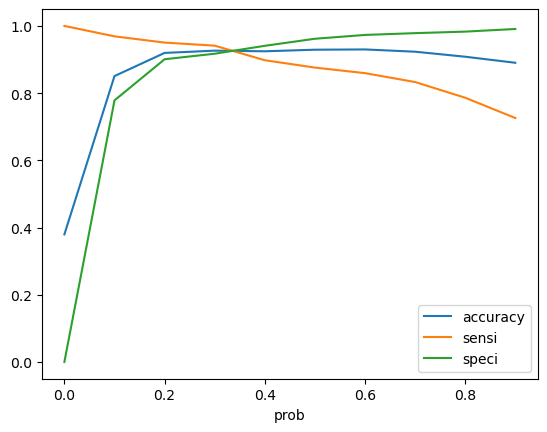

In [2820]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.30 is the optimum point to take it as a cutoff probability.

In [2822]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.30 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.354318,7962,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.085177,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.014610,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.986848,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.013460,9170,0,1,0,0,0,0,0,0,0,0,0,0


In [2823]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.354318,7962,1,35
1,0,0.085177,5520,0,9
2,0,0.014610,1962,0,1
3,1,0.986848,1566,1,99
4,0,0.013460,9170,0,1


In [2824]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9263967357187696

In [2825]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3626,  327],
       [ 142, 2277]], dtype=int64)

In [2826]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2827]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9412980570483671

In [2828]:
# Let us calculate specificity
TN / float(TN+FP)

0.9172780166961801

### Observation:Tthe model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:2.66%

Accuracy : 92.63%

Sensitivity : 94.13%

Specificity : 91.73%

In [2832]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8744239631336406


In [2833]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.08272198330381988


In [2834]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9623142250530785


In [2835]:
##### Precision
TP / TP + FP

confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.8744239631336406

In [2836]:
##### Recall
TP / TP + FN

confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.9412980570483671

In [2837]:
from sklearn.metrics import precision_score, recall_score

In [2838]:
print("Precision Score:",precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted))

Precision Score: 0.8744239631336406


In [2839]:
print("Recall Score:",recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))

Recall Score: 0.9412980570483671


##### Precision Recall Curve

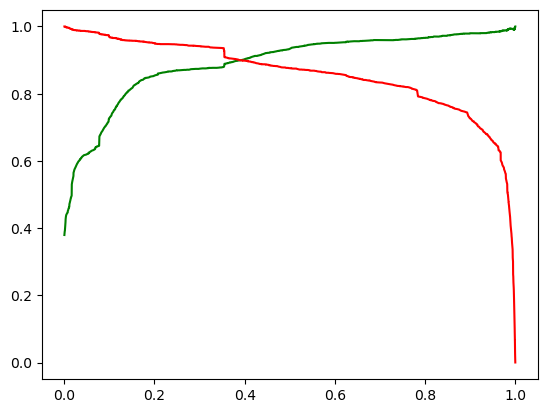

In [2841]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [2842]:
#scaling test set
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,...,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
3504,0,0,-0.089406,-0.108519,0.308788,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4050,0,0,-0.788357,-0.888077,-1.133359,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
7201,1,0,-0.322390,0.420993,-0.171928,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1196,0,0,0.143578,-0.110357,0.789504,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8219,0,0,0.842530,-0.433947,-0.292107,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [2843]:
X_test = X_test[col] # Col has final feature columns selected by model prediction
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Specialization_Available,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
3504,-0.108519,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4050,-0.888077,1,0,0,1,0,0,0,0,0,0,0,0,1,0
7201,0.420993,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1196,-0.110357,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8219,-0.433947,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [2980]:
X_test_sm = sm.add_constant(X_test)

### Prediction on Test data set

In [2983]:
y_test_pred = res.predict(X_test_sm)

In [2985]:
y_test_pred[:10]

3504    0.003594
4050    0.994858
7201    0.165493
1196    0.003587
8219    0.986369
8747    0.076785
9048    0.642879
6524    0.002313
7693    0.067877
8187    0.206394
dtype: float64

In [2987]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [2989]:
y_pred_1.head()

,0
3504,0.003594
4050,0.994858
7201,0.165493
1196,0.003587
8219,0.986369


In [2991]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [2993]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [2995]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [2997]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [2999]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.003594
1,1,4050,0.994858
2,0,7201,0.165493
3,0,1196,0.003587
4,1,8219,0.986369


In [3001]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [3007]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]

In [3009]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [3011]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.003594,0
1,4050,1,0.994858,99
2,7201,0,0.165493,17
3,1196,0,0.003587,0
4,8219,1,0.986369,99


In [3013]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [3015]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,0.003594,0,0
1,4050,1,0.994858,99,1
2,7201,0,0.165493,17,0
3,1196,0,0.003587,0,0
4,8219,1,0.986369,99,1


In [3017]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9264005858659832

In [3019]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1558,  131],
       [  70,  972]], dtype=int64)

In [3021]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [3023]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9328214971209213

In [3025]:
# Let us calculate specificity
TN / float(TN+FP)

0.9224393132030787

In [3027]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8812330009066183

In [3029]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9328214971209213

### Observation on Test Data set

Accuracy: 92.64%

Sensitivity: 93.28%

Specificity: 92.24%

### Evaluation Result Comparison

#### Train Data Set

Accuracy : 92.63%
Sensitivity : 94.13%
Specificity : 91.73%


#### Test Data Set

Accuracy: 92.64%
Sensitivity: 93.28%
Specificity: 92.24%